### Import Libraries

In [6]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import tensorflow as tf

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install --upgrade tensorflow keras

In [5]:
!pip install scikeras

### Import Dataset

In [7]:
df = pd.read_csv("NASA data for ANN & SVM.csv")
df[:5]

,time and date,air temperature,surface humidity,radiance intensity,surface incomming short wave flux,total column ozone,total precipitateable water vapours,wind speed
0,8/1/2019 0:00,20.733210,0.015783,336.418793,2.65332,269.776154,19.257727,6.649365
1,8/1/2019 1:00,20.610926,0.015502,333.328033,107.12500,268.784729,18.675245,6.926465
2,8/1/2019 2:00,20.968317,0.015116,330.606750,320.00000,268.444275,18.060242,7.402035
3,8/1/2019 3:00,23.868128,0.012997,335.808411,545.50000,269.155518,17.486549,7.386476
4,8/1/2019 4:00,26.353357,0.010358,343.027130,747.00000,270.530609,17.188797,7.045732


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13176 entries, 0 to 13175
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   time and date                        13176 non-null  object 
 1   air temperature                      13176 non-null  float64
 2   surface humidity                     13176 non-null  float64
 3   radiance intensity                   13176 non-null  float64
 4   surface incomming short wave flux    13176 non-null  float64
 5   total column ozone                   13176 non-null  float64
 6   total precipitateable water vapours  13176 non-null  float64
 7   wind speed                           13176 non-null  float64
dtypes: float64(7), object(1)
memory usage: 823.6+ KB


In [9]:
df.describe()

,air temperature,surface humidity,radiance intensity,surface incomming short wave flux,total column ozone,total precipitateable water vapours,wind speed
count,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000
mean,12.031988,0.004905,262.223297,270.657571,276.117049,8.002597,5.369408
std,9.112877,0.003472,48.902828,350.722496,18.891512,5.993243,2.226993
min,-9.843390,0.000498,149.974533,0.000000,227.644287,0.474742,0.680669
25%,4.677850,0.002298,223.358696,0.000000,263.918030,3.541818,3.715424
50%,11.789804,0.003910,261.602936,11.839844,272.287216,6.491242,5.137253
75%,19.466761,0.006444,298.003952,569.250000,286.358642,10.822983,6.747079
max,31.157282,0.017878,391.483673,1125.500000,369.622864,41.036938,16.384342


# Data Analysis

### Distribution of Air Temperature

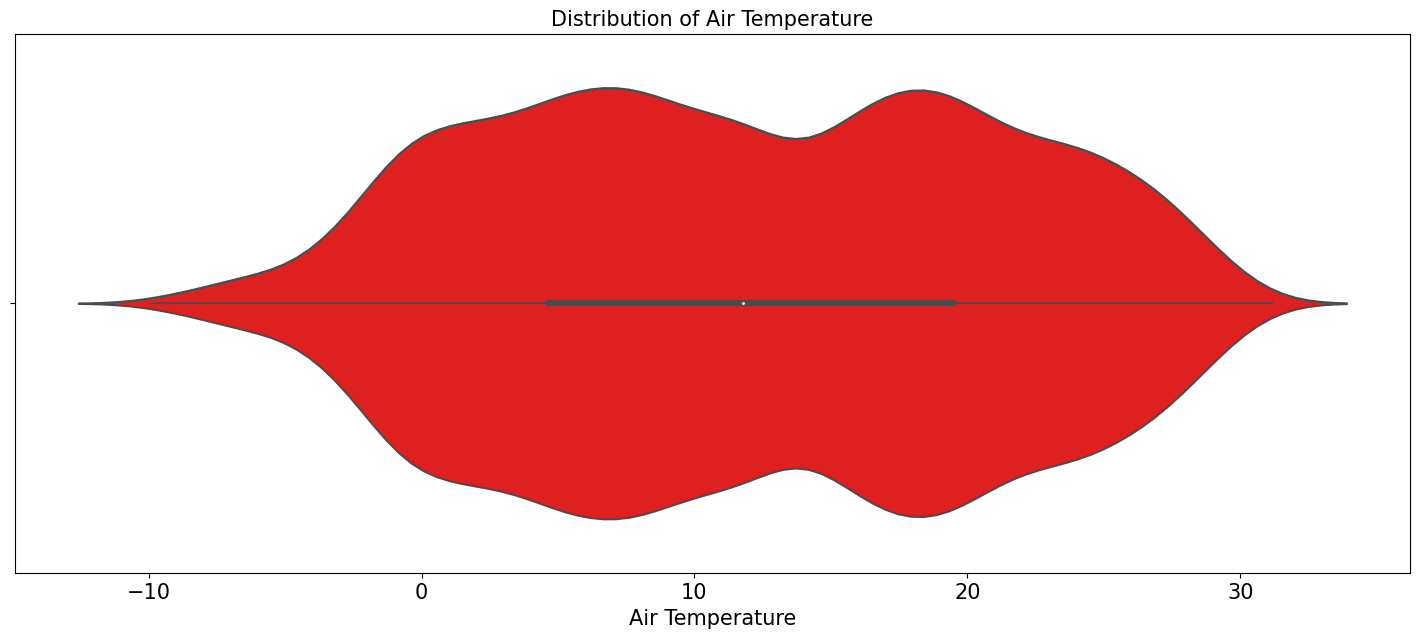

In [10]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "air temperature", data = df, color = "red")
plt.title("Distribution of Air Temperature", size = 15)
plt.xlabel("Air Temperature", size = 15)
plt.xticks(size = 15)
plt.show()

### Distrinution of Surface Humidity

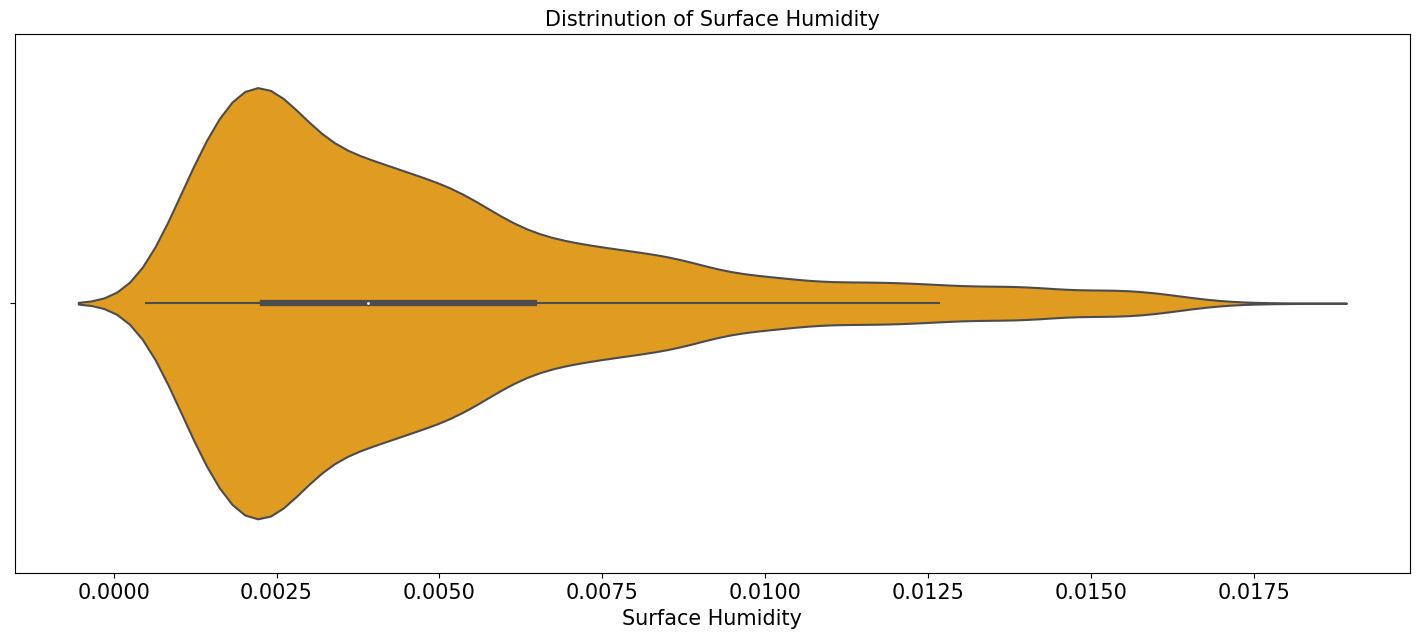

In [11]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "surface humidity", data = df, color = "orange")
plt.title("Distrinution of Surface Humidity", size = 15)
plt.xlabel("Surface Humidity", size = 15)
plt.xticks(size = 15)
plt.show()

### Distribution of Radiance Intensity

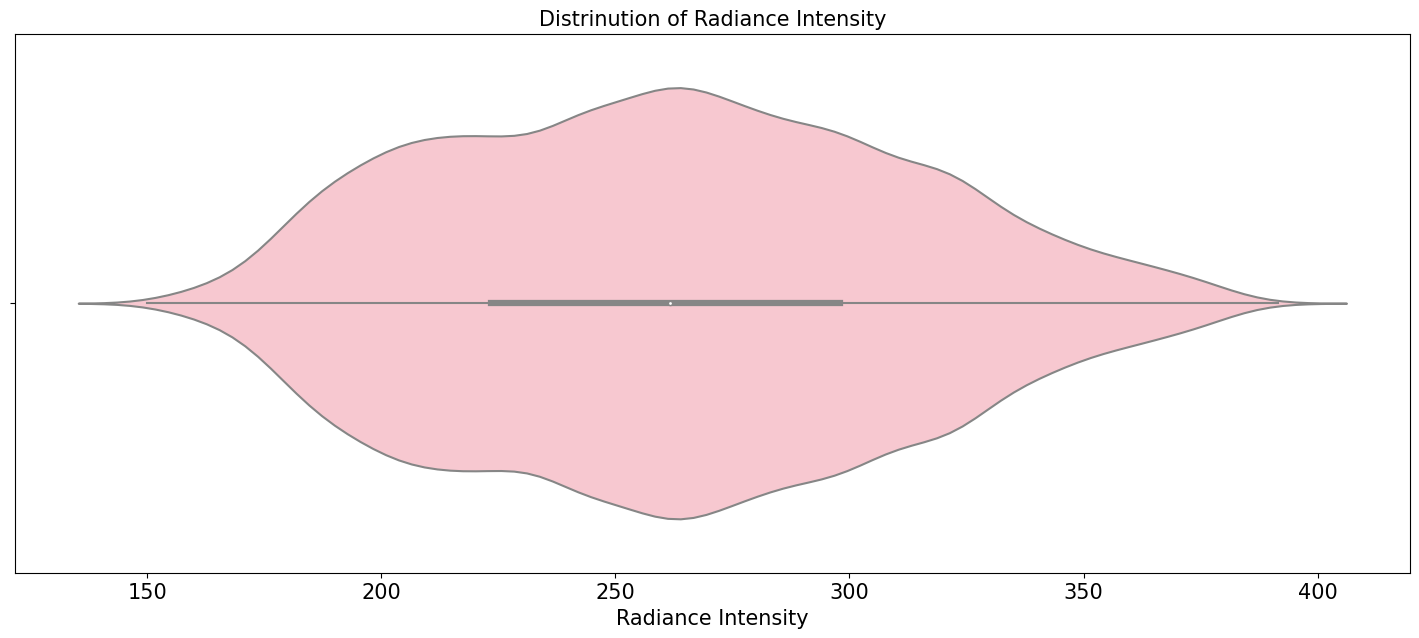

In [12]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "radiance intensity", data = df, color = "pink")
plt.title("Distrinution of Radiance Intensity", size = 15)
plt.xlabel("Radiance Intensity", size = 15)
plt.xticks(size = 15)
plt.show()

### Distribution of Surface Incomming Short Wave Flux

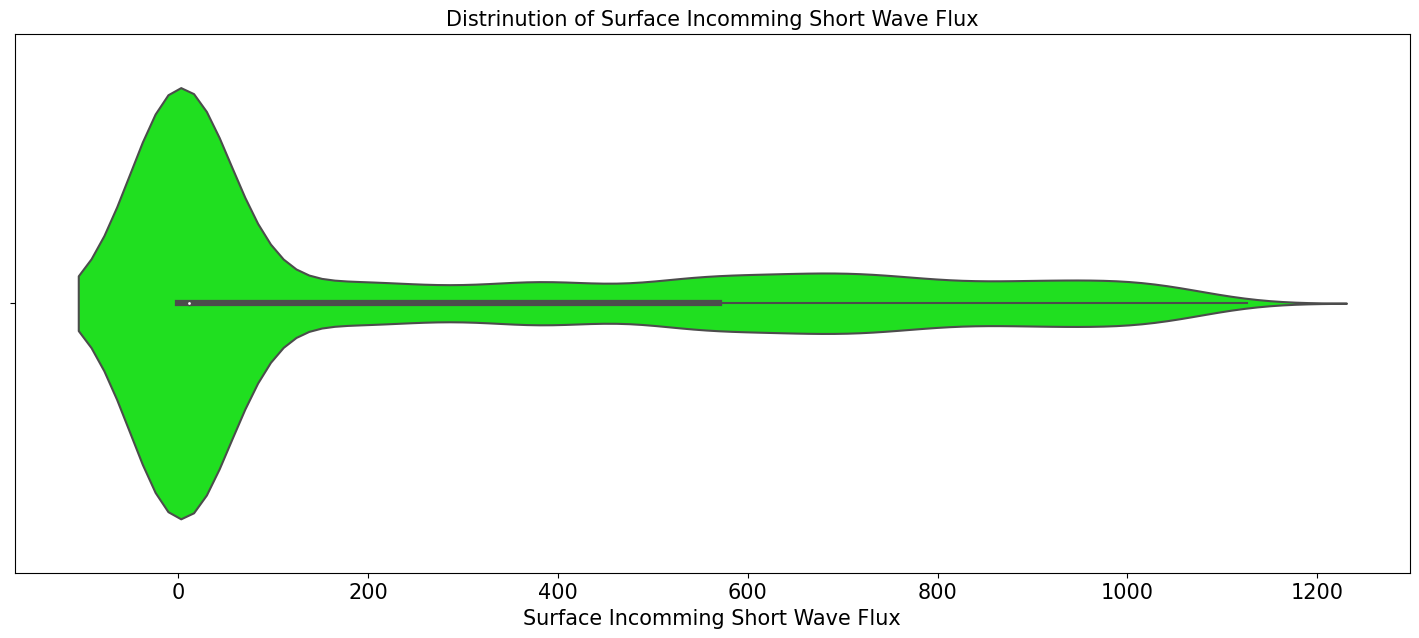

In [13]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "surface incomming short wave flux", data = df, color = "lime")
plt.title("Distrinution of Surface Incomming Short Wave Flux", size = 15)
plt.xlabel("Surface Incomming Short Wave Flux", size = 15)
plt.xticks(size = 15)
plt.show()

### Distribution of Ozone

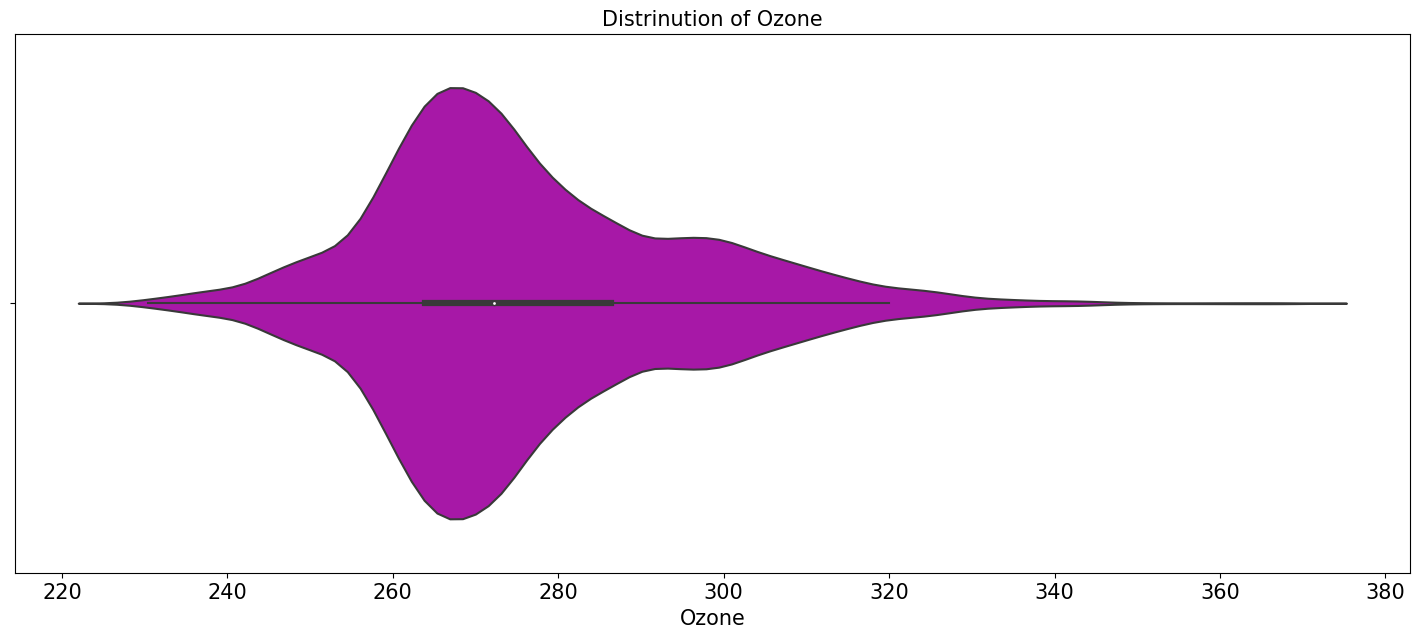

In [14]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "total column ozone", data = df, color = "m")
plt.title("Distrinution of Ozone", size = 15)
plt.xlabel("Ozone", size = 15)
plt.xticks(size = 15)
plt.show()

### Distribution of Total Precipitateable Water Vapours

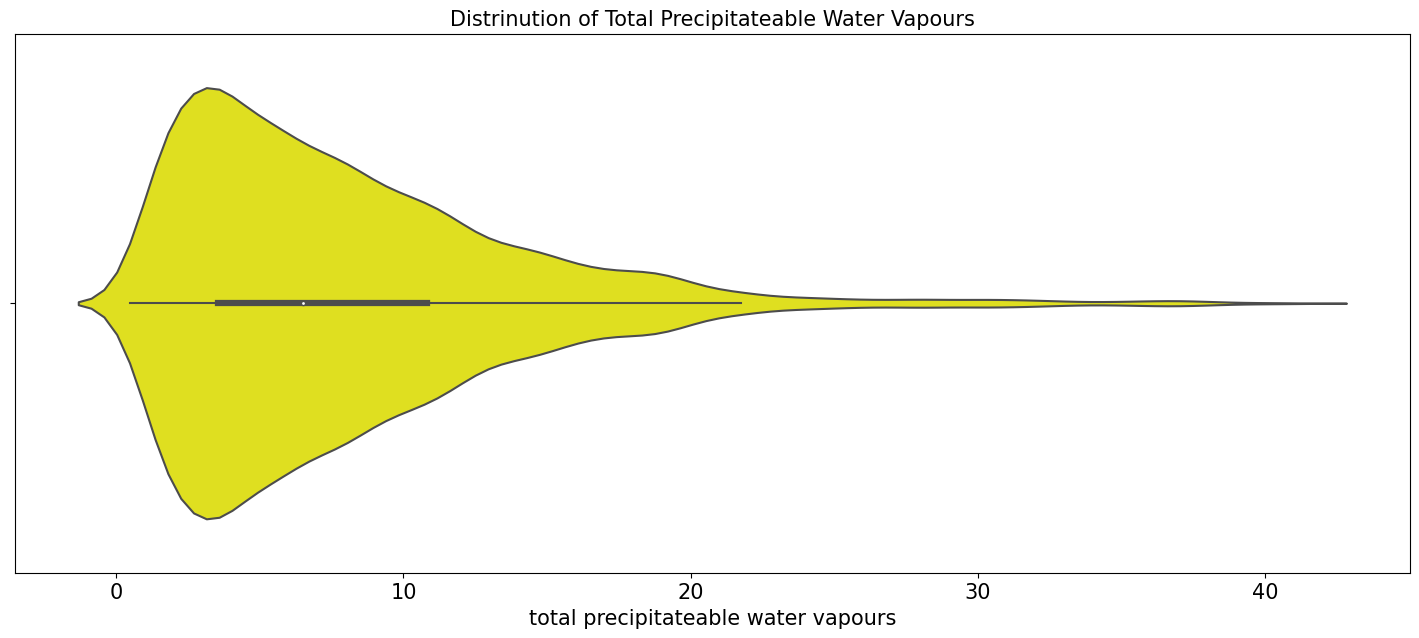

In [15]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "total precipitateable water vapours", data = df, color = "yellow")
plt.title("Distrinution of Total Precipitateable Water Vapours", size = 15)
plt.xlabel("total precipitateable water vapours", size = 15)
plt.xticks(size = 15)
plt.show()

### Distribution of Wind Speed

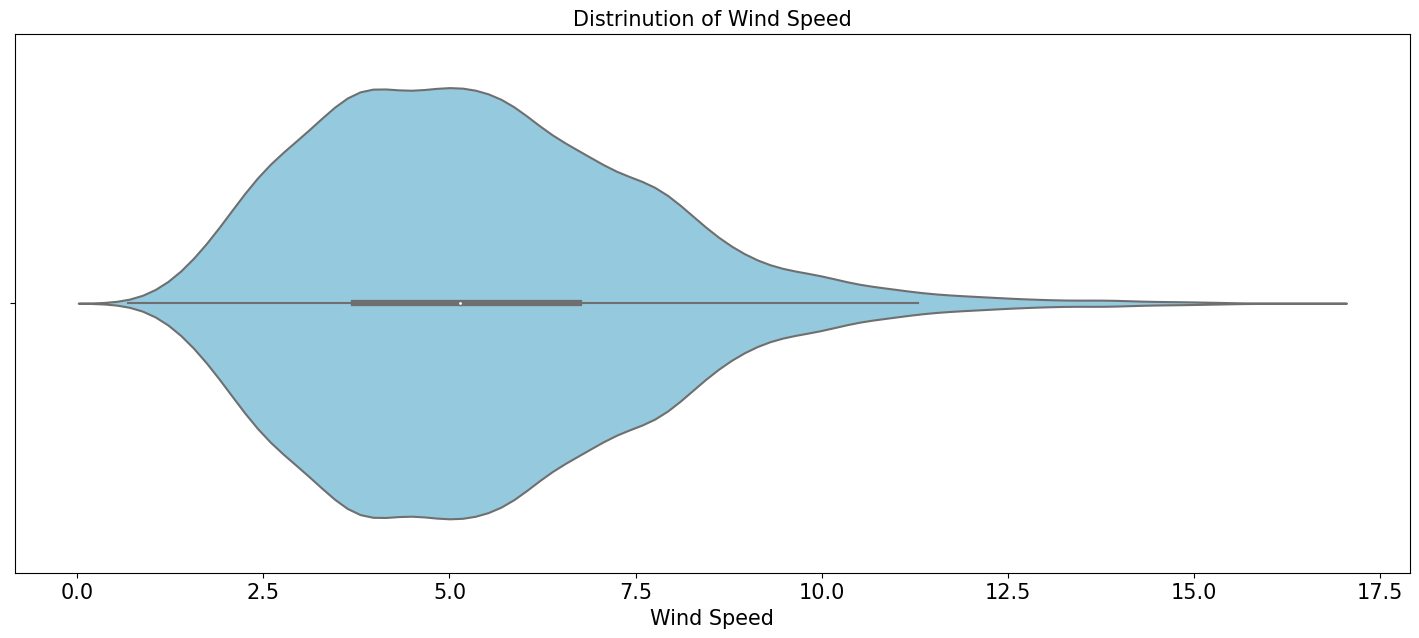

In [16]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "wind speed", data = df, color = "skyblue")
plt.title("Distrinution of Wind Speed", size = 15)
plt.xlabel("Wind Speed", size = 15)
plt.xticks(size = 15)
plt.show()

# Air Temperature Prediction with SVM

In [17]:
# Festures
X = df[["surface humidity", "radiance intensity", "surface incomming short wave flux", "total column ozone", "total precipitateable water vapours",  "wind speed"]]

# Target
y = df["air temperature"]

In [18]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Instantiate Linear SVM Object
svm = SVR()

# Instantiate the GridSearchCV object and run the search
parameter = {'kernel':["linear", "poly"]}

searcher = GridSearchCV(svm, parameter)

searcher.fit(X_train_std, y_train)

# Report the best parameter and the corresponding score
print("Best CV params", searcher.best_params_, "\n")

print("Best CV accuracy", searcher.best_score_)

Best CV params {'kernel': 'linear'} 

Best CV accuracy 0.8432069099687383


In [19]:
pred_s1 = searcher.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_s1})[:5]

,Actual,Predicted
4058,-6.792426,-2.733573
11646,12.119471,10.376901
12411,0.780634,-2.620318
5556,11.831202,14.237177
2348,-0.552649,-0.363476


In [20]:
rmse = MSE(y_test, pred_s1)**(0.5)
print("Root Mean Squared Error =", rmse)

Root Mean Squared Error = 3.621845991485428


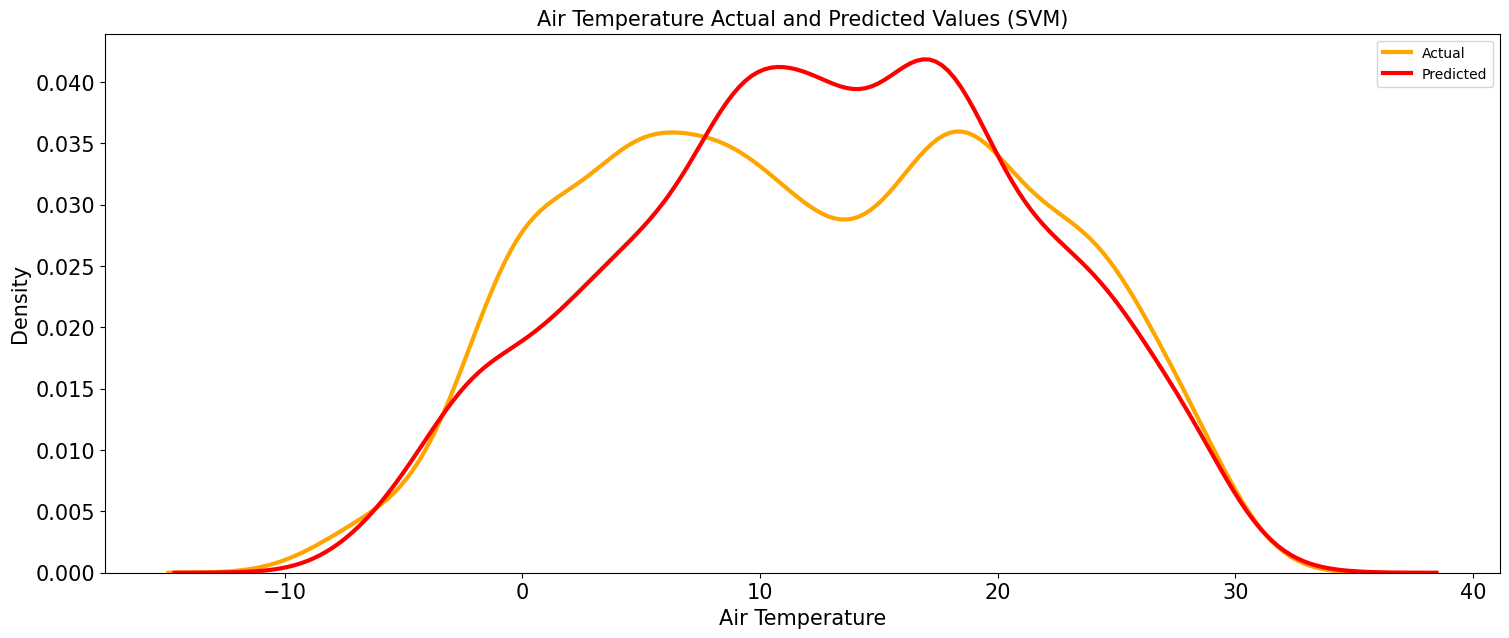

In [21]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_s1, label = "Predicted", linewidth = 3, color = "red")
plt.title("Air Temperature Actual and Predicted Values (SVM)", size = 15)
plt.xlabel("Air Temperature", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Air Temperature Prediction with ANN

In [22]:
# Festures
X = df[["surface humidity", "radiance intensity", "surface incomming short wave flux", "total column ozone", "total precipitateable water vapours",  "wind speed"]]

# Target
y = df["air temperature"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_std, y_train, batch_size = 10, epochs = 100)

pred_a1 = model.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_a1.flatten()})[:5]

Epoch 1/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 71.6227
Epoch 2/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.9588
Epoch 3/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.4655
Epoch 4/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.9152
Epoch 5/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.1309
Epoch 6/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.0183
Epoch 7/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.8867
Epoch 8/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.9252
Epoch 9/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.9424
Epoch 10/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.6838
Epoch 11/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.3970
Epoch 12/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.4111
Epoch 13/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.3598
Epoch 14/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.4298
Epoch 15/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 

,Actual,Predicted
5887,11.081903,13.547322
7604,17.537561,17.150217
11165,12.235376,11.037027
10517,12.550318,15.662082
691,18.082880,19.708145


In [24]:
rmse = MSE(y_test, pred_a1)**(0.5)
print("Root Mean Squared Error =", rmse.round(2))

Root Mean Squared Error = 2.29


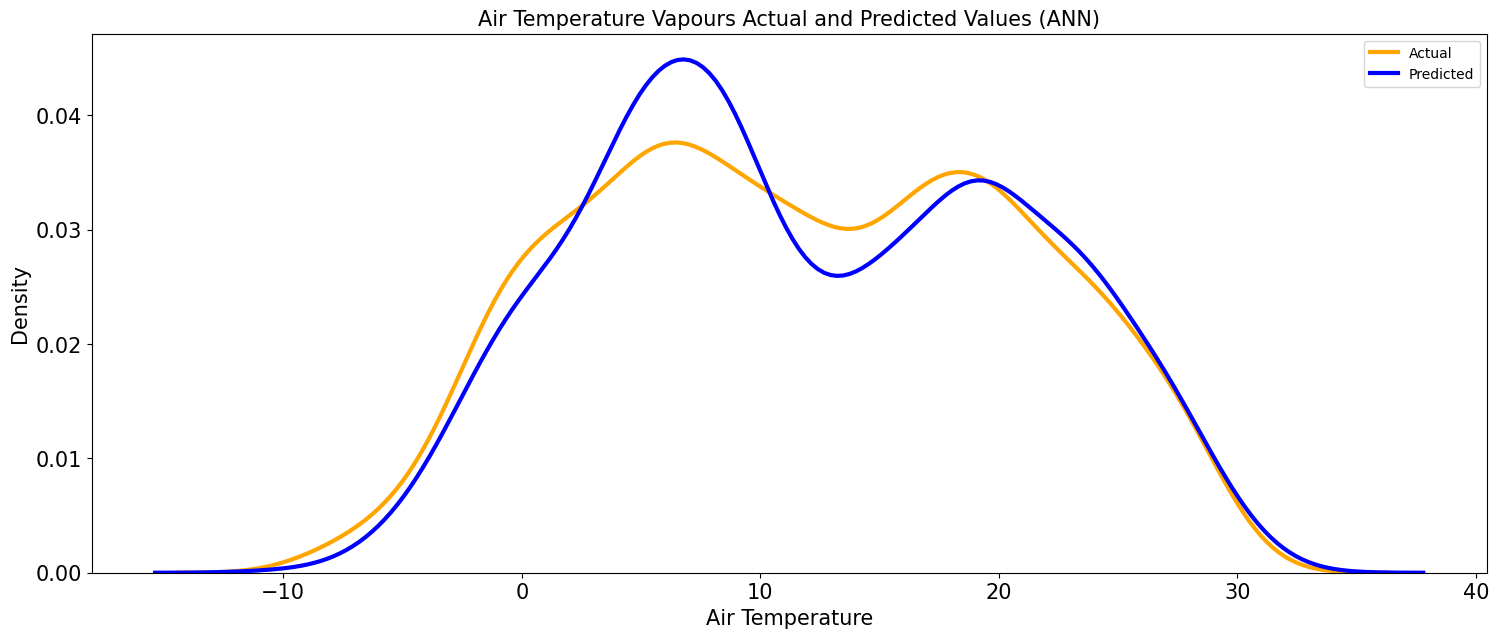

In [25]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a1.flatten(), label = "Predicted", linewidth = 3, color = "blue")
plt.title("Air Temperature Vapours Actual and Predicted Values (ANN)", size = 15)
plt.xlabel("Air Temperature", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Air Temperature Prediction Comparison (SVM & ANN)

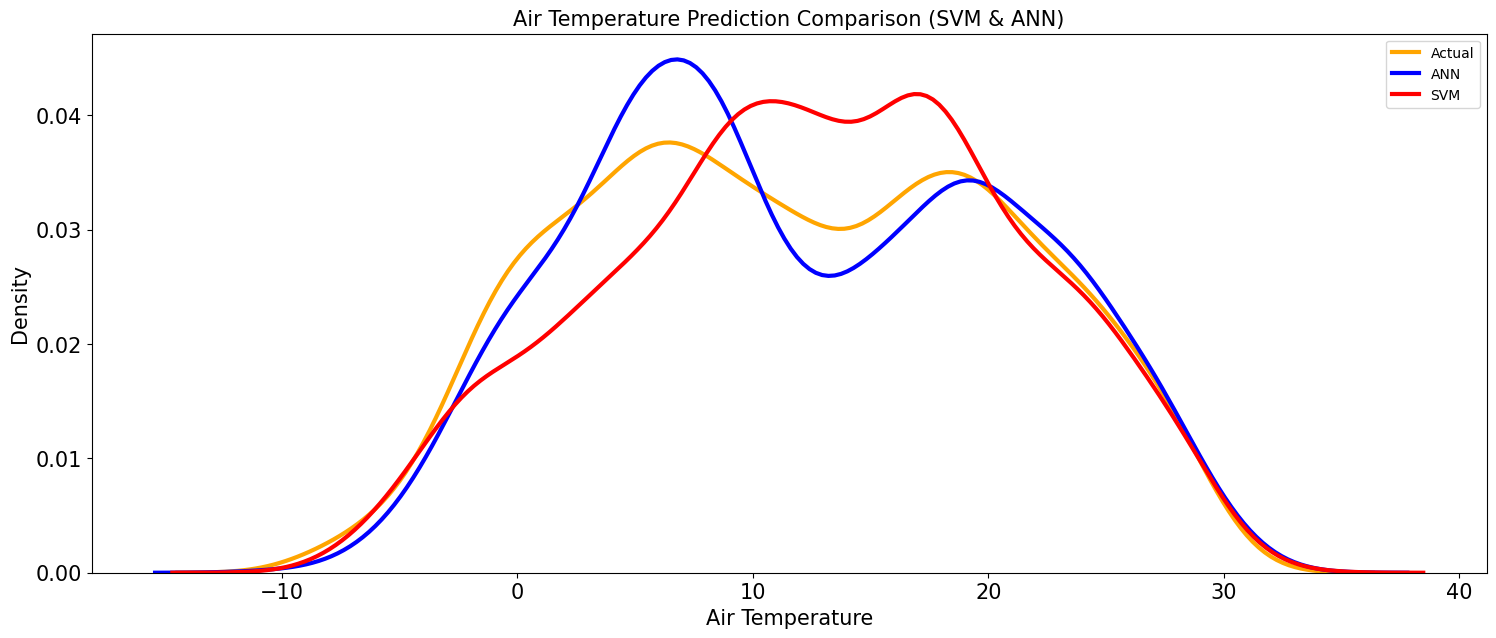

In [26]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a1.flatten(), label = "ANN", linewidth = 3, color = "blue")
sns.kdeplot(pred_s1.flatten(), label = "SVM", linewidth = 3, color = "red")
plt.title("Air Temperature Prediction Comparison (SVM & ANN)", size = 15)
plt.xlabel("Air Temperature", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Surface Humidity Prediction with SVM

In [27]:
# Festures
X = df[["air temperature", "radiance intensity", "surface incomming short wave flux", "total column ozone", "total precipitateable water vapours",  "wind speed"]]

# Target
y = df["surface humidity"]

In [28]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Instantiate Linear SVM Object
svm = SVR()

# Instantiate the GridSearchCV object and run the search
parameter = {'kernel':["linear", "poly"]}

searcher = GridSearchCV(svm, parameter)

searcher.fit(X_train_std, y_train)

# Report the best parameter and the corresponding score
print("Best CV params", searcher.best_params_, "\n")

print("Best CV accuracy", searcher.best_score_)

Best CV params {'kernel': 'linear'} 

Best CV accuracy -1.4612078877699208


In [29]:
pred_s2 = searcher.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_s2})[:5]

,Actual,Predicted
4058,0.001789,0.009099
11646,0.001990,0.009099
12411,0.001217,0.009099
5556,0.005413,0.009099
2348,0.003840,0.009099


In [30]:
rmse = MSE(y_test, pred_s2)**(0.5)
print("Root Mean Squared Error =", rmse)

Root Mean Squared Error = 0.005429770633444614


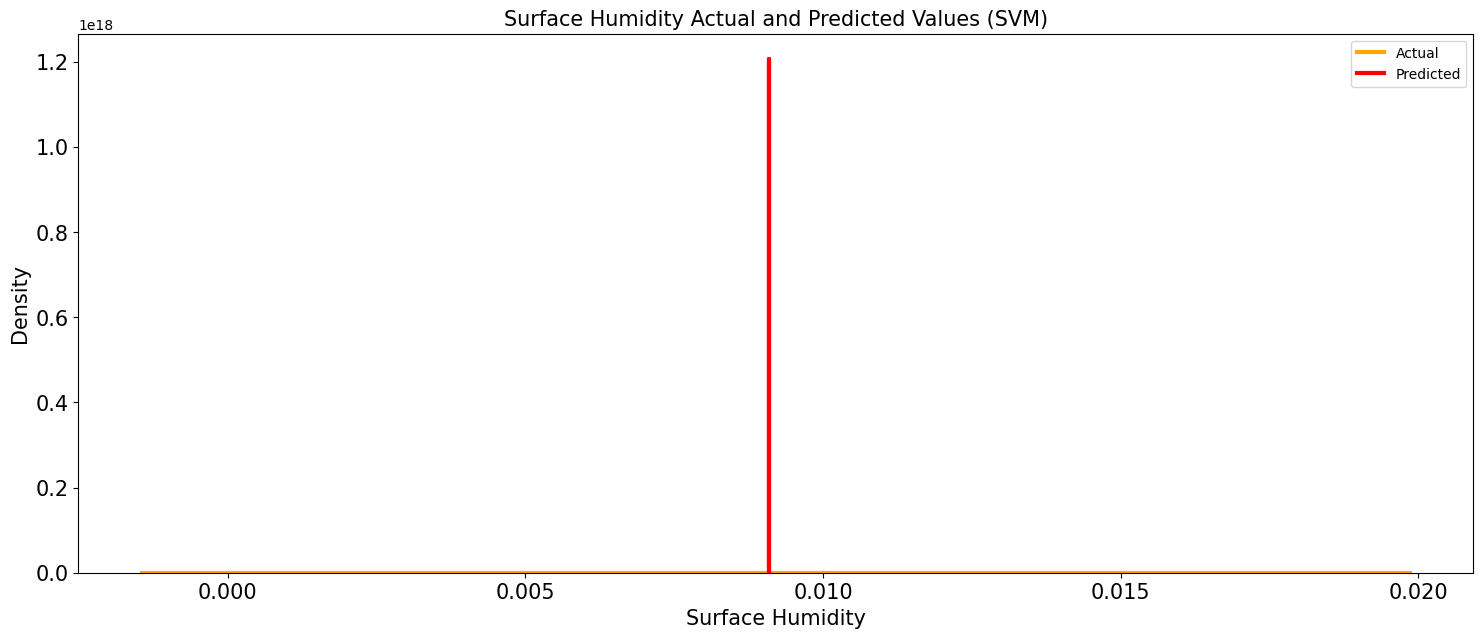

In [31]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_s2, label = "Predicted", linewidth = 3, color = "red")
plt.title("Surface Humidity Actual and Predicted Values (SVM)", size = 15)
plt.xlabel("Surface Humidity", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

**There is no variance in predicted values through SVM so Actual / Predicted graph is not made**

# Surface Humidity Prediction with ANN

In [32]:
# Festures
X = df[["air temperature", "radiance intensity", "surface incomming short wave flux", "total column ozone", "total precipitateable water vapours",  "wind speed"]]

# Target
y = df["surface humidity"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_std, y_train, batch_size = 10, epochs = 100)

pred_a2 = model.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_a2.flatten()})[:5]

Epoch 1/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0323
Epoch 2/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.2369e-04
Epoch 3/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.6701e-05
Epoch 4/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.7399e-05
Epoch 5/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3857e-05
Epoch 6/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8823e-05
Epoch 7/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5512e-05
Epoch 8/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5509e-05
Epoch 9/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.2391e-05
Epoch 10/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.0562e-06
Epoch 11/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.8178e-06
Epoch 12/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.3021e-06
Epoch 13/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.1146e-06
Epoch 14/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.

,Actual,Predicted
12783,0.001240,0.002756
6479,0.006274,0.005068
1577,0.009333,0.009477
3485,0.001762,0.001908
11320,0.005866,0.005053


In [34]:
rmse = MSE(y_test, pred_a2)**(0.5)
print("Root Mean Squared Error =", rmse.round(5))

Root Mean Squared Error = 0.00097


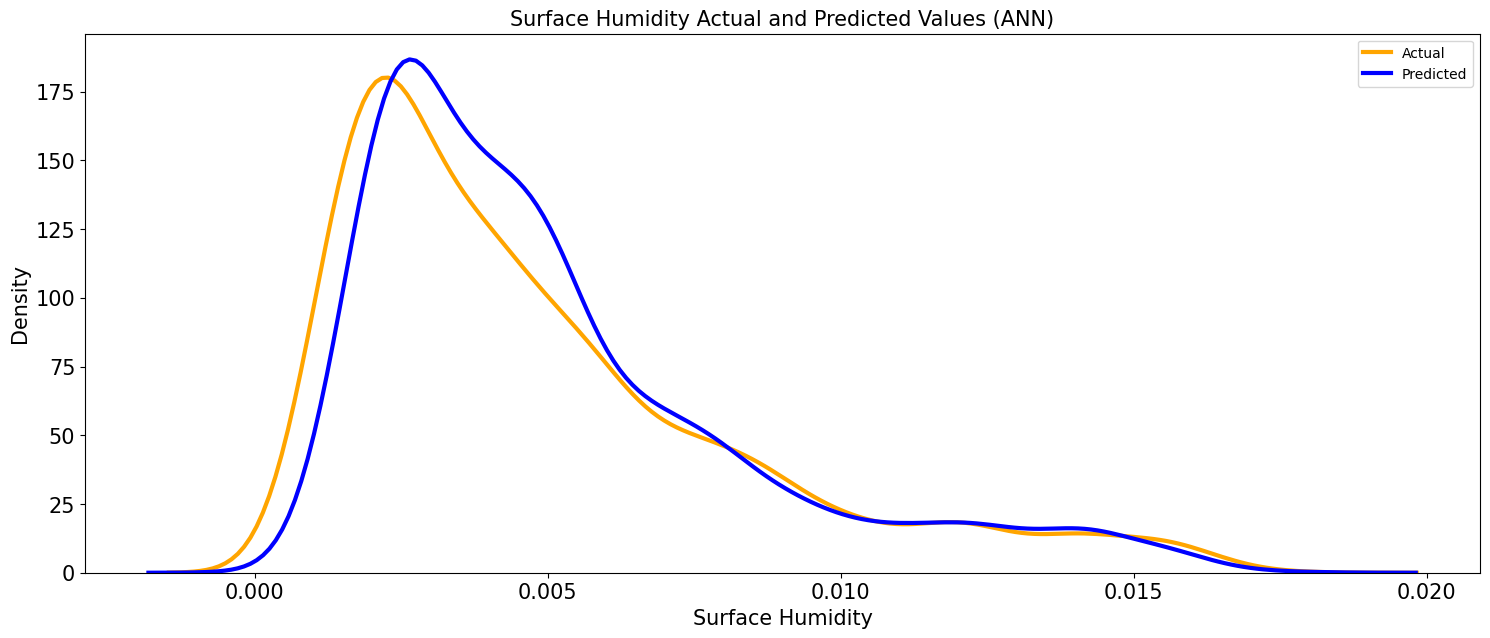

In [35]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a2.flatten(), label = "Predicted", linewidth = 3, color = "blue")
plt.title("Surface Humidity Actual and Predicted Values (ANN)", size = 15)
plt.xlabel("Surface Humidity", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Radiance Intensity Prediction with SVM

In [36]:
# Festures
X = df[["surface humidity", "air temperature", "surface incomming short wave flux", "total column ozone", "total precipitateable water vapours",  "wind speed"]]

# Target
y = df["radiance intensity"]

In [37]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Instantiate Linear SVM Object
svm = SVR()

# Instantiate the GridSearchCV object and run the search
parameter = {'kernel':["linear", "poly"]}

searcher = GridSearchCV(svm, parameter)

searcher.fit(X_train_std, y_train)

# Report the best parameter and the corresponding score
print("Best CV params", searcher.best_params_, "\n")

print("Best CV accuracy", searcher.best_score_)

Best CV params {'kernel': 'linear'} 

Best CV accuracy 0.9289001619208935


In [38]:
pred_s3 = searcher.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_s3})[:5]

,Actual,Predicted
4058,189.641861,177.705916
11646,232.179001,242.808734
12411,178.912582,193.120926
5556,292.888306,279.301215
2348,206.002441,209.243730


In [39]:
rmse = MSE(y_test, pred_s3)**(0.5)
print("Root Mean Squared Error =", rmse)

Root Mean Squared Error = 13.09546866582213


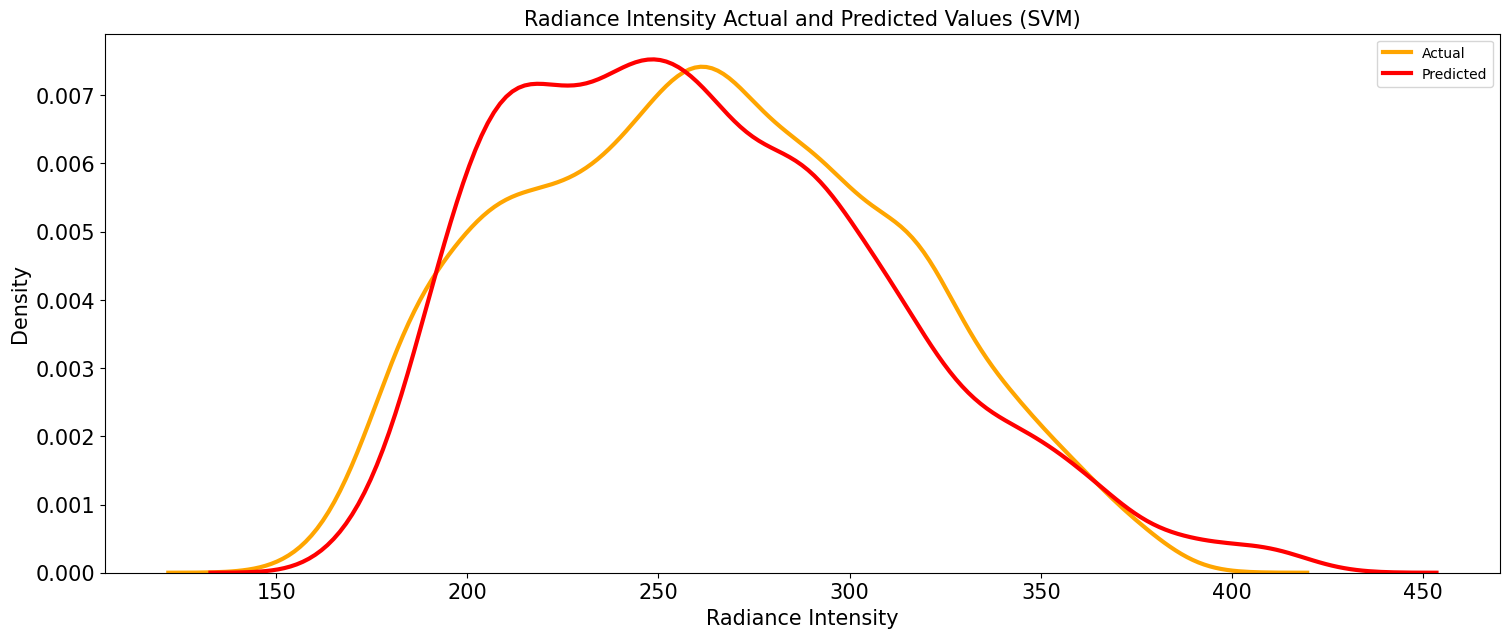

In [40]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_s3, label = "Predicted", linewidth = 3, color = "red")
plt.title("Radiance Intensity Actual and Predicted Values (SVM)", size = 15)
plt.xlabel("Radiance Intensity", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Radiance Intensity Prediction with ANN

In [41]:
# Festures
X = df[["air temperature", "surface humidity", "surface incomming short wave flux", "total column ozone", "total precipitateable water vapours",  "wind speed"]]

# Target
y = df["radiance intensity"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_std, y_train, batch_size = 10, epochs = 100)

pred_a3 = model.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_a3.flatten()})[:5]

Epoch 1/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 31226.9082
Epoch 2/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 582.7493
Epoch 3/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 219.4308
Epoch 4/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 97.7425
Epoch 5/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 81.5615
Epoch 6/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 78.5384
Epoch 7/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 74.8450
Epoch 8/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 73.7522
Epoch 9/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 68.5493
Epoch 10/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 67.1774
Epoch 11/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 66.5078
Epoch 12/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 67.8122
Epoch 13/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 66.2714
Epoch 14/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 66.3753
Epoch 15/100
923/923 ━━━

,Actual,Predicted
4279,214.675781,220.340927
4745,214.095871,214.487427
8757,332.039948,324.270264
1020,281.091370,272.336700
7158,288.727875,283.760803


In [43]:
rmse = MSE(y_test, pred_a3)**(0.5)
print("Root Mean Squared Error =", rmse.round(2))

Root Mean Squared Error = 8.5


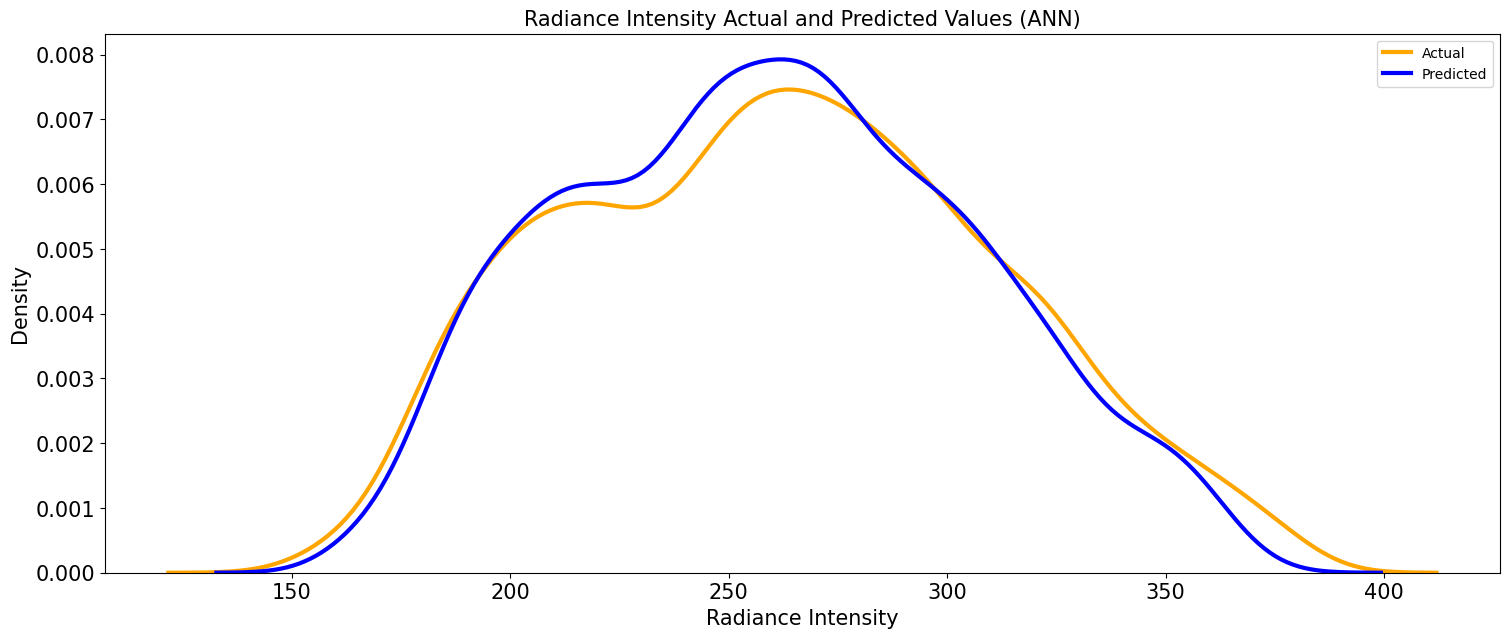

In [44]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a3.flatten(), label = "Predicted", linewidth = 3, color = "blue")
plt.title("Radiance Intensity Actual and Predicted Values (ANN)", size = 15)
plt.xlabel("Radiance Intensity", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Radiance Intensity Prediction Comparison (SVM & ANN)

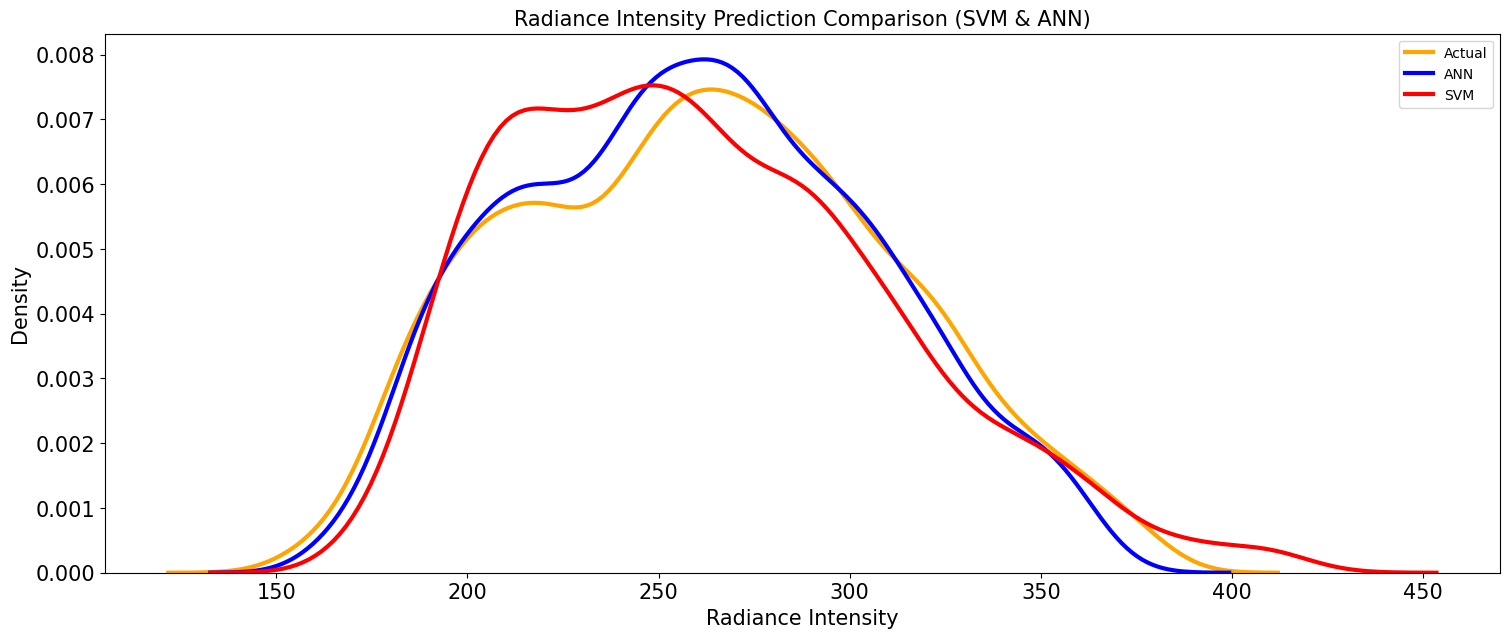

In [45]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a3.flatten(), label = "ANN", linewidth = 3, color = "blue")
sns.kdeplot(pred_s3.flatten(), label = "SVM", linewidth = 3, color = "red")
plt.title("Radiance Intensity Prediction Comparison (SVM & ANN)", size = 15)
plt.xlabel("Radiance Intensity", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Surface Incomming Short Wave Flux Prediction with SVM

In [46]:
# Festures
X = df[["surface humidity", "air temperature", "radiance intensity", "total column ozone", "total precipitateable water vapours",  "wind speed"]]

# Target
y = df["surface incomming short wave flux"]

In [47]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Instantiate Linear SVM Object
svm = SVR()

# Instantiate the GridSearchCV object and run the search
parameter = {'kernel':["linear", "poly"]}

searcher = GridSearchCV(svm, parameter)

searcher.fit(X_train_std, y_train)

# Report the best parameter and the corresponding score
print("Best CV params", searcher.best_params_, "\n")

print("Best CV accuracy", searcher.best_score_)

Best CV params {'kernel': 'linear'} 

Best CV accuracy 0.15011350792361883


In [48]:
pred_s4 = searcher.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_s4})[:5]

,Actual,Predicted
4058,27.71875,-7.567816
11646,658.50000,197.564156
12411,193.31250,22.702724
5556,177.25000,270.039575
2348,0.00000,47.349852


In [49]:
rmse = MSE(y_test, pred_s4)**(0.5)
print("Root Mean Squared Error =", rmse)

Root Mean Squared Error = 323.23540165608483


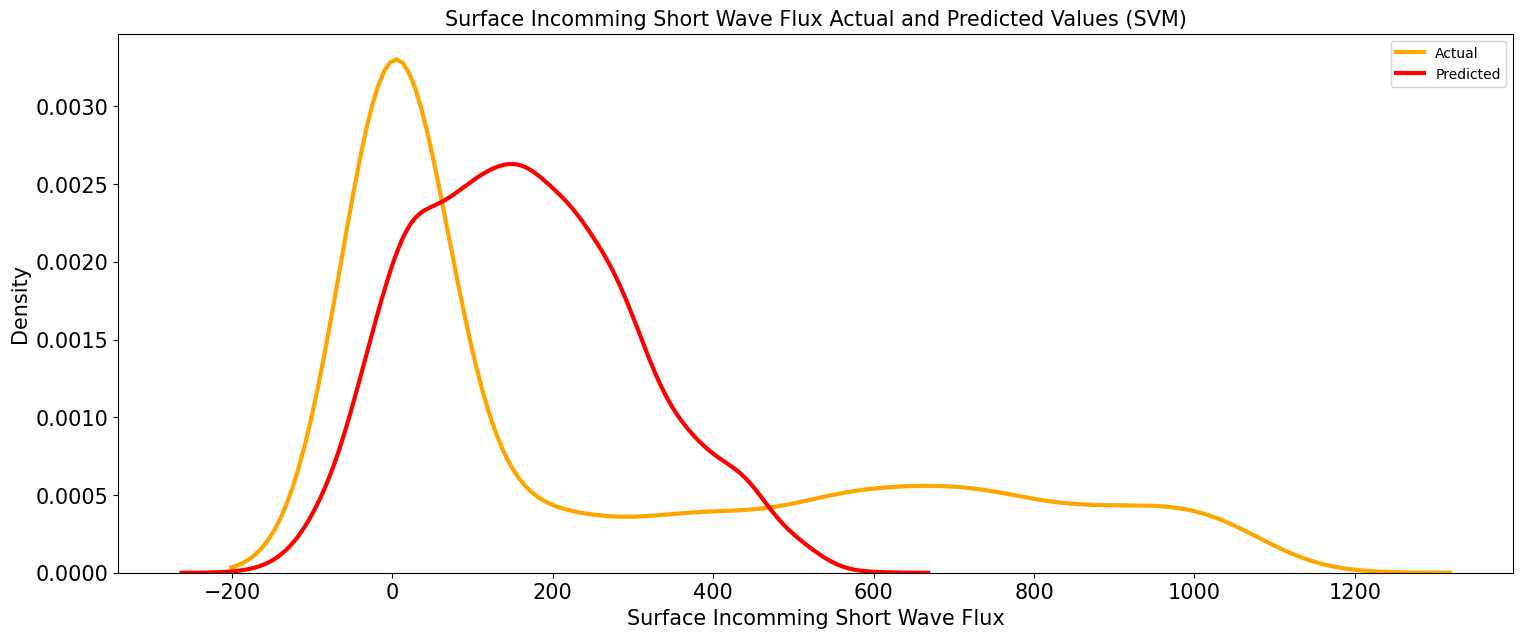

In [50]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_s4, label = "Predicted", linewidth = 3, color = "red")
plt.title("Surface Incomming Short Wave Flux Actual and Predicted Values (SVM)", size = 15)
plt.xlabel("Surface Incomming Short Wave Flux", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Surface Incomming Short Wave Flux Prediction with ANN

In [51]:
# Festures
X = df[["air temperature", "surface humidity", "radiance intensity", "total column ozone", "total precipitateable water vapours",  "wind speed"]]

# Target
y = df["surface incomming short wave flux"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_std, y_train, batch_size = 10, epochs = 100)

pred_a4 = model.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_a4.flatten()})[:5]

Epoch 1/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 148659.7500
Epoch 2/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 85178.4688
Epoch 3/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 81646.7109
Epoch 4/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 78309.4766
Epoch 5/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 78505.6875
Epoch 6/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 76027.5156
Epoch 7/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 75763.2500
Epoch 8/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 76820.4219
Epoch 9/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 73979.5469
Epoch 10/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 71296.6562
Epoch 11/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 71133.4609
Epoch 12/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 70416.8203
Epoch 13/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 69009.8438
Epoch 14/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - los

,Actual,Predicted
11929,0.000000,73.430397
3318,628.500000,226.491821
3084,21.648438,303.357391
3603,192.437500,150.702667
1252,660.750000,609.944214


In [53]:
rmse = MSE(y_test, pred_a4)**(0.5)
print("Root Mean Squared Error =", rmse.round(2))

Root Mean Squared Error = 252.89


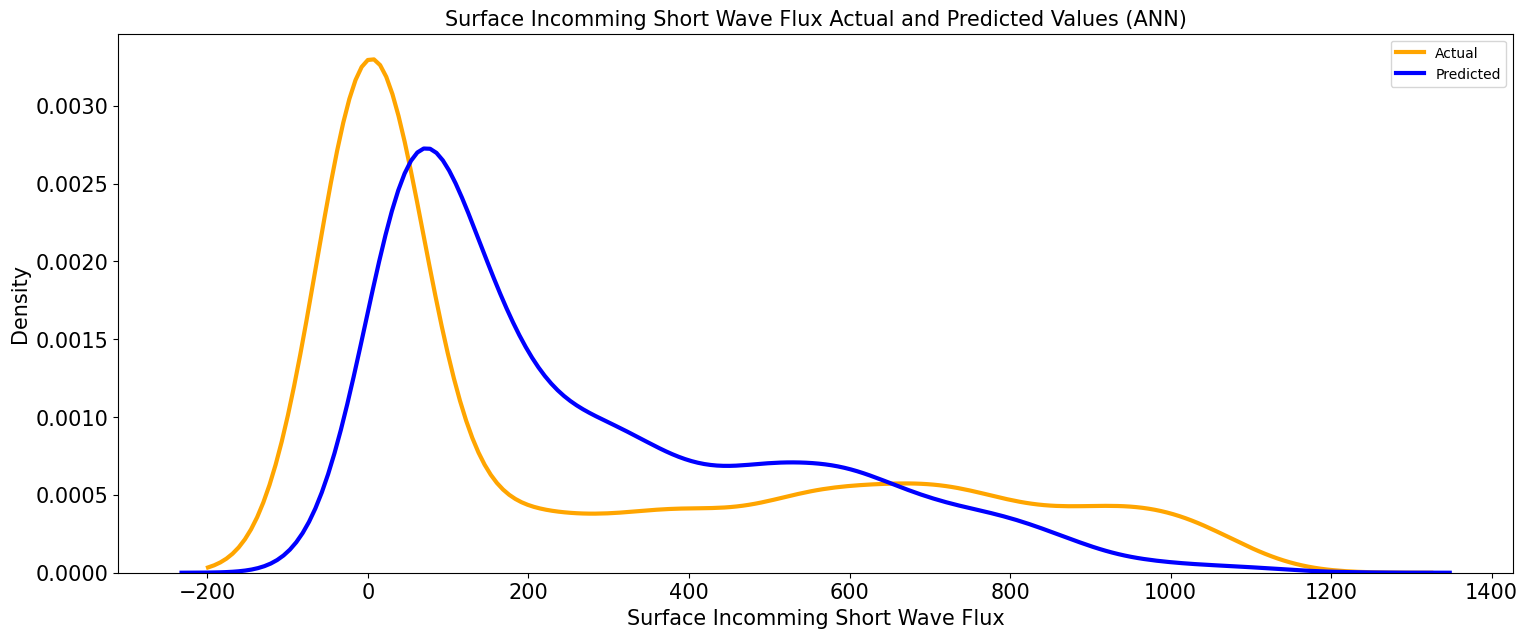

In [54]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a4.flatten(), label = "Predicted", linewidth = 3, color = "blue")
plt.title("Surface Incomming Short Wave Flux Actual and Predicted Values (ANN)", size = 15)
plt.xlabel("Surface Incomming Short Wave Flux", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Surface Incomming Short Wave Flux Prediction Comparison (SVM & ANN)

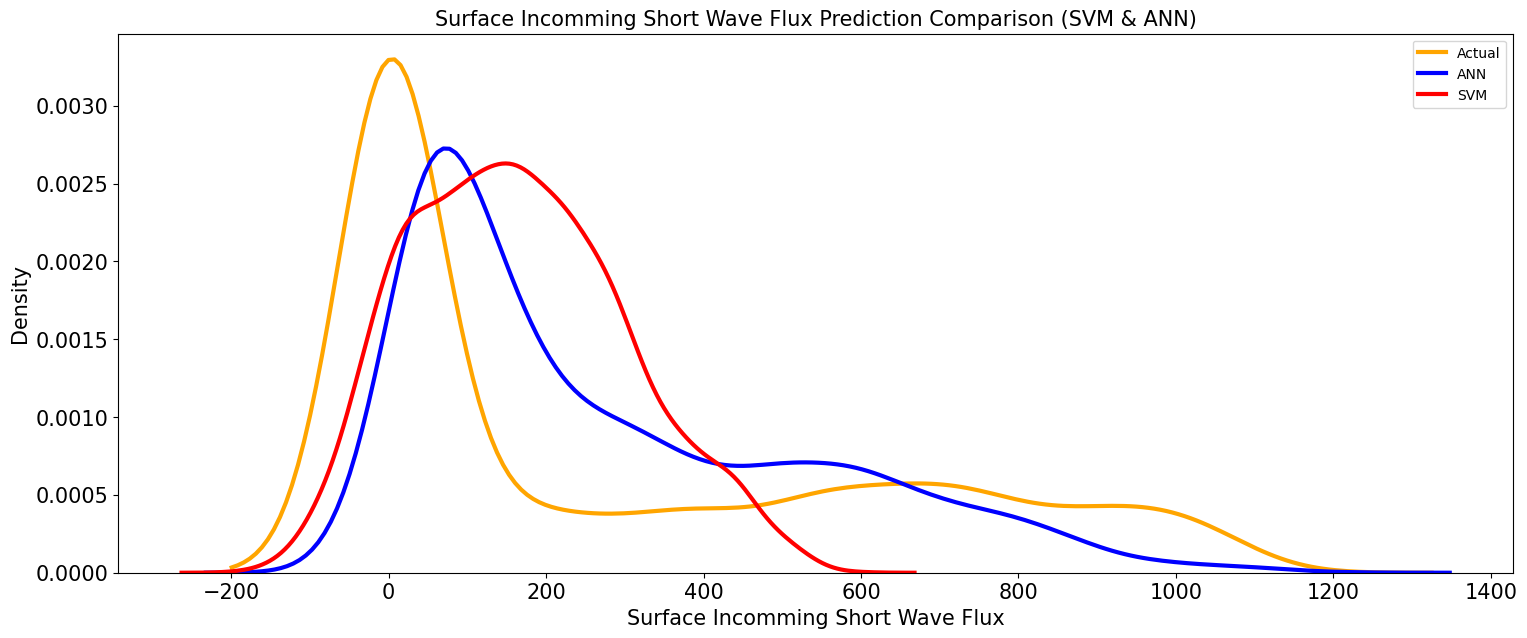

In [55]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a4.flatten(), label = "ANN", linewidth = 3, color = "blue")
sns.kdeplot(pred_s4.flatten(), label = "SVM", linewidth = 3, color = "red")
plt.title("Surface Incomming Short Wave Flux Prediction Comparison (SVM & ANN)", size = 15)
plt.xlabel("Surface Incomming Short Wave Flux", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Ozone Prediction with SVM

In [56]:
# Festures
X = df[["air temperature", "surface humidity", "radiance intensity", "surface incomming short wave flux", "total precipitateable water vapours",  "wind speed"]]

# Target
y = df["total column ozone"]

In [57]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Instantiate Linear SVM Object
svm = SVR()

# Instantiate the GridSearchCV object and run the search
parameter = {'kernel':["linear", "poly"]}

searcher = GridSearchCV(svm, parameter)

searcher.fit(X_train_std, y_train)

# Report the best parameter and the corresponding score
print("Best CV params", searcher.best_params_, "\n")

print("Best CV accuracy", searcher.best_score_)

Best CV params {'kernel': 'linear'} 

Best CV accuracy 0.27519689653877594


In [58]:
pred_s5 = searcher.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_s5})[:5]

,Actual,Predicted
4058,311.280609,293.479892
11646,257.083588,270.012607
12411,301.125732,275.633126
5556,315.893311,281.335975
2348,296.226837,285.841585


In [59]:
rmse = MSE(y_test, pred_s5)**(0.5)
print("Root Mean Squared Error =", rmse)

Root Mean Squared Error = 16.493382087625402


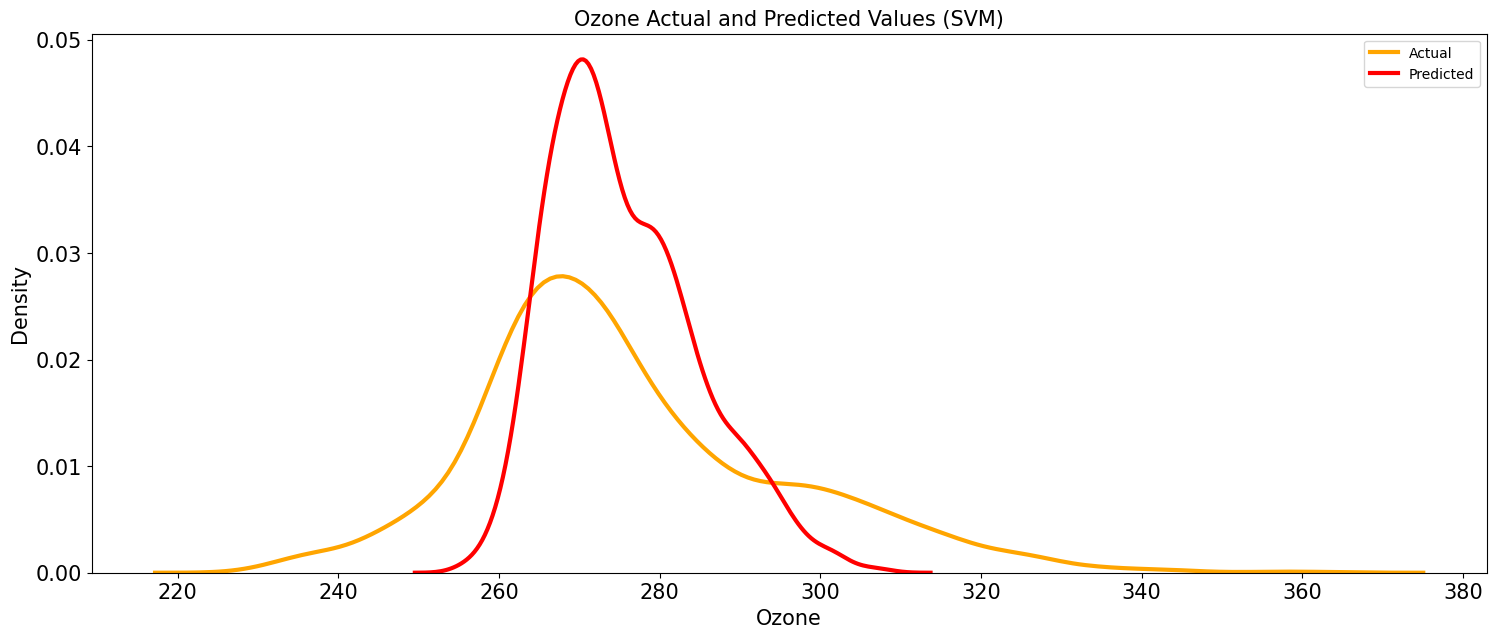

In [60]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_s5, label = "Predicted", linewidth = 3, color = "red")
plt.title("Ozone Actual and Predicted Values (SVM)", size = 15)
plt.xlabel("Ozone", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Ozone Prediction with ANN

In [61]:
# Festures
X = df[["air temperature", "surface humidity", "radiance intensity", "surface incomming short wave flux", "total precipitateable water vapours",  "wind speed"]]

# Target
y = df["total column ozone"]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_std, y_train, batch_size = 10, epochs = 100)

pred_a5 = model.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_a5.flatten()})[:5]

Epoch 1/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 33331.5156
Epoch 2/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 621.5036
Epoch 3/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 339.6068
Epoch 4/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 281.7017
Epoch 5/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 267.3348
Epoch 6/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 253.0350
Epoch 7/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 237.5358
Epoch 8/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 237.3930
Epoch 9/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 233.8575
Epoch 10/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 234.8120
Epoch 11/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 228.7831
Epoch 12/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 223.8779
Epoch 13/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 228.1726
Epoch 14/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 221.4433
Epoch 15/100


,Actual,Predicted
9923,263.154938,263.933533
4359,288.681793,290.270508
9924,263.359894,262.913818
5025,259.868561,278.895782
9206,264.099976,266.812927


In [63]:
rmse = MSE(y_test, pred_a5)**(0.5)
print("Root Mean Squared Error =", rmse.round(2))

Root Mean Squared Error = 14.03


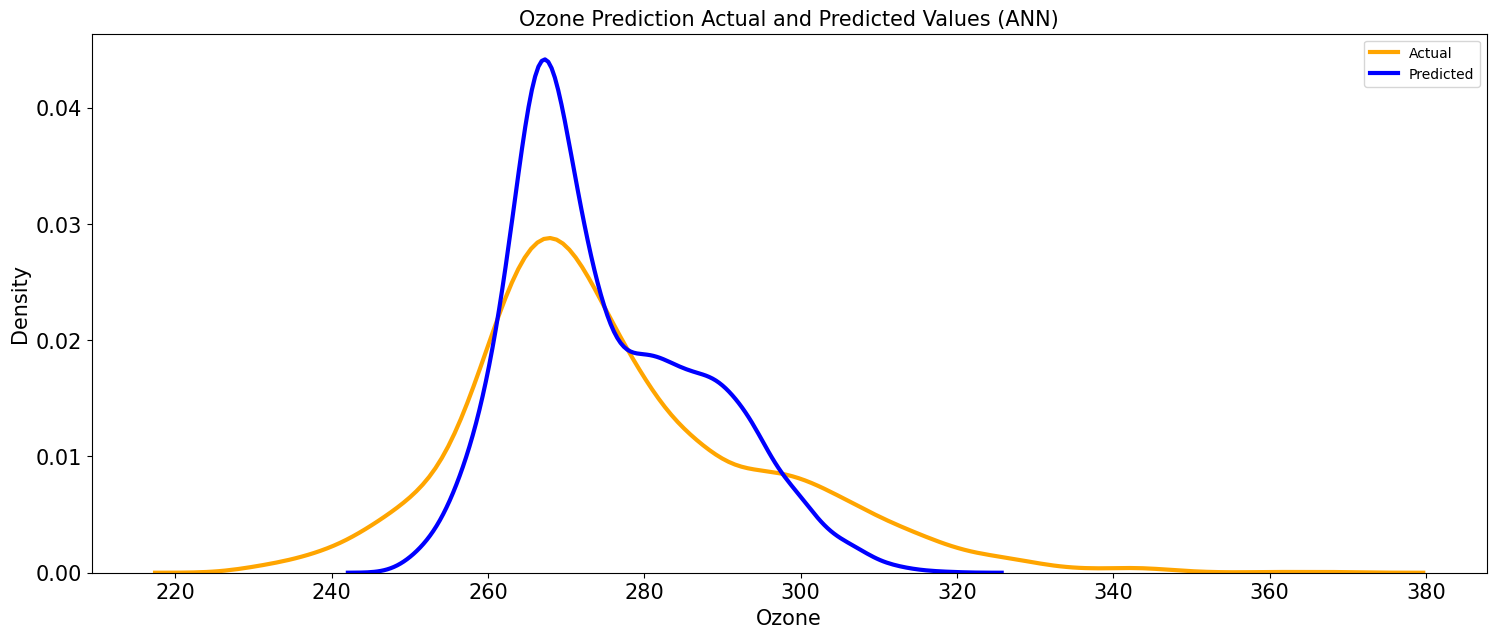

In [64]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a5.flatten(), label = "Predicted", linewidth = 3, color = "blue")
plt.title("Ozone Prediction Actual and Predicted Values (ANN)", size = 15)
plt.xlabel("Ozone", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Ozone Prediction Comparison (SVM & ANN)

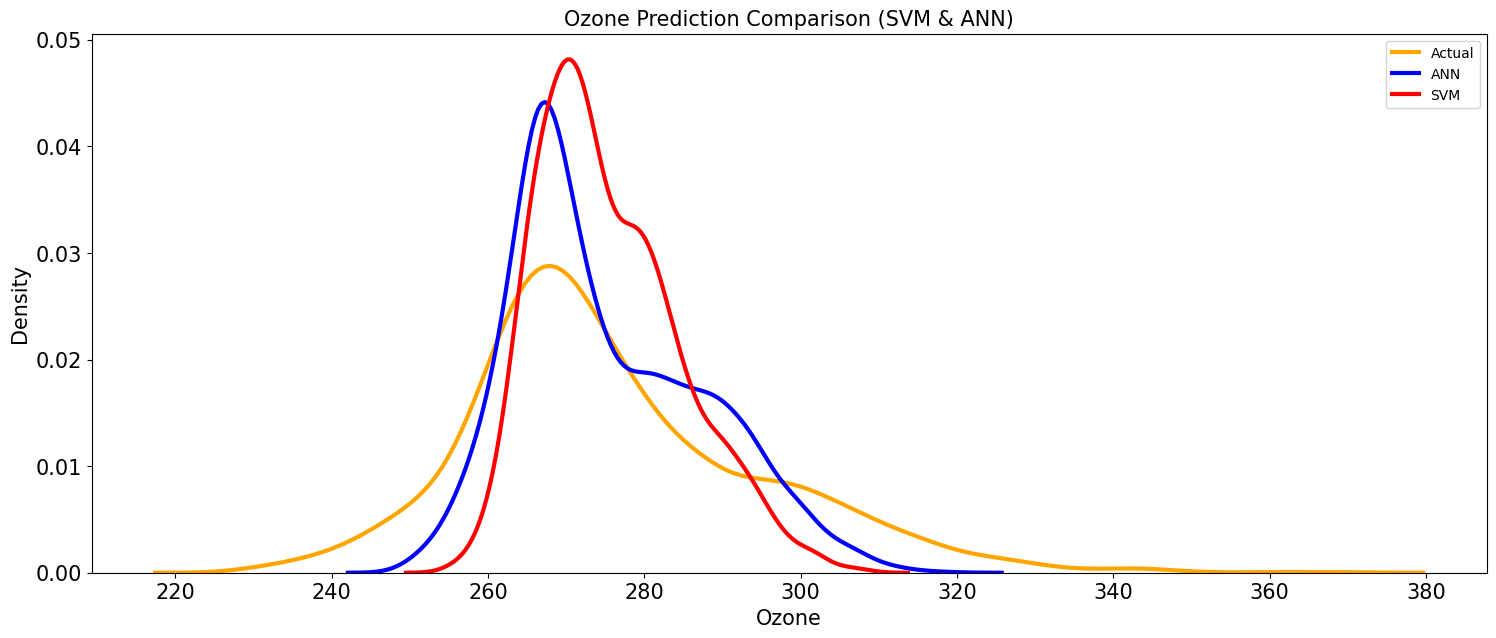

In [65]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a5.flatten(), label = "ANN", linewidth = 3, color = "blue")
sns.kdeplot(pred_s5.flatten(), label = "SVM", linewidth = 3, color = "red")
plt.title("Ozone Prediction Comparison (SVM & ANN)", size = 15)
plt.xlabel("Ozone", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Total Precipitateable Water Vapours Prediction with SVM

In [66]:
# Festures
X = df[["surface humidity", "air temperature", "radiance intensity", "surface incomming short wave flux", "total column ozone",  "wind speed"]]

# Target
y = df["total precipitateable water vapours"]

In [67]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Instantiate Linear SVM Object
svm = SVR()

# Instantiate the GridSearchCV object and run the search
parameter = {'kernel':["linear", "poly"]}

searcher = GridSearchCV(svm, parameter)

searcher.fit(X_train_std, y_train)

# Report the best parameter and the corresponding score
print("Best CV params", searcher.best_params_, "\n")

print("Best CV accuracy", searcher.best_score_)

Best CV params {'kernel': 'poly'} 

Best CV accuracy 0.8348099739823107


In [68]:
pred_s6 = searcher.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_s6})[:5]

,Actual,Predicted
4058,2.317266,2.124072
11646,6.417947,5.062353
12411,1.085830,-0.731446
5556,11.433157,7.804461
2348,4.319731,5.509454


In [69]:
rmse = MSE(y_test, pred_s6)**(0.5)
print("Root Mean Squared Error =", rmse)

Root Mean Squared Error = 2.4397065673676495


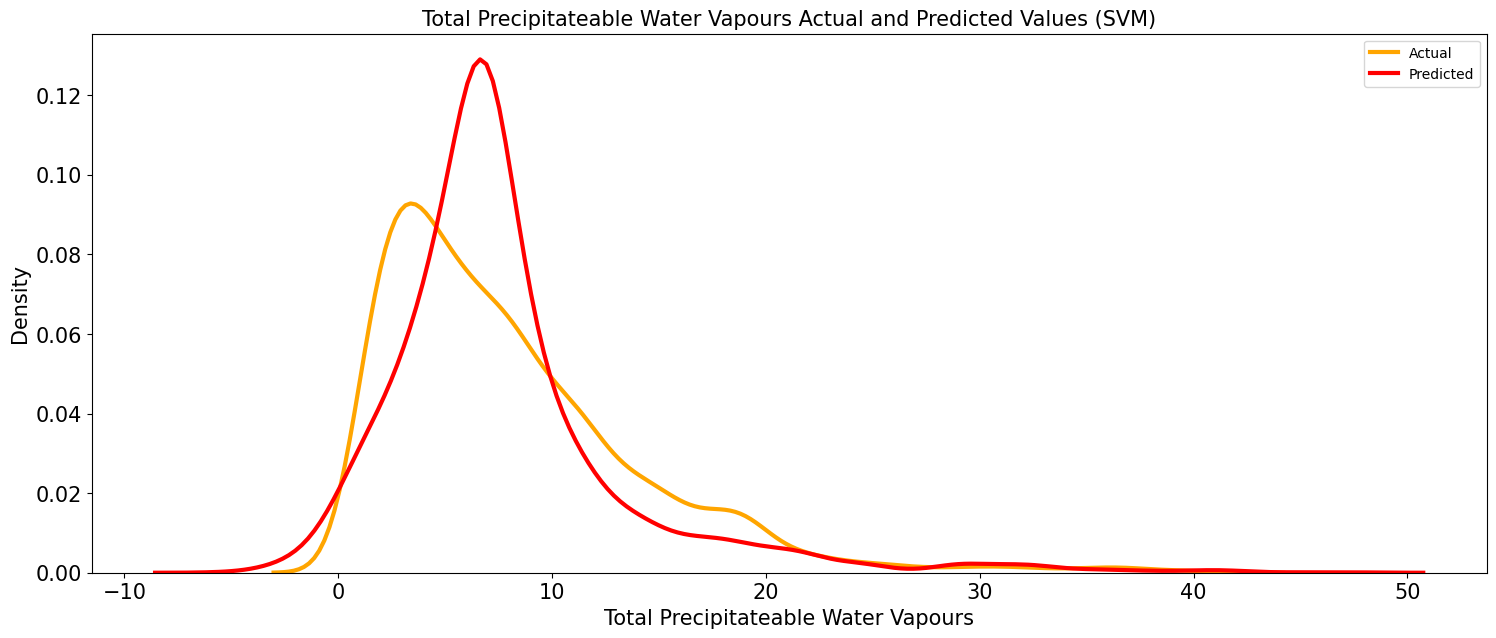

In [70]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_s6, label = "Predicted", linewidth = 3, color = "red")
plt.title("Total Precipitateable Water Vapours Actual and Predicted Values (SVM)", size = 15)
plt.xlabel("Total Precipitateable Water Vapours", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Total Precipitateable Water Vapours Prediction with ANN

In [71]:
# Festures
X = df[["air temperature", "surface humidity", "radiance intensity", "surface incomming short wave flux", "total column ozone",  "wind speed"]]

# Target
y = df["total precipitateable water vapours"]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_std, y_train, batch_size = 10, epochs = 100)

pred_b6 = model.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_b6.flatten()})[:5]

Epoch 1/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 24.0805
Epoch 2/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.9946
Epoch 3/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.6927
Epoch 4/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.1736
Epoch 5/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.9004
Epoch 6/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.9057
Epoch 7/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.7726
Epoch 8/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.6819
Epoch 9/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.6382
Epoch 10/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.7802
Epoch 11/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.5671
Epoch 12/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.6411
Epoch 13/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.8237
Epoch 14/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.5383
Epoch 15/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 

,Actual,Predicted
8828,7.841697,9.490442
8081,7.284686,7.293541
5249,3.680552,4.801874
11631,3.523880,6.737128
2964,3.118341,2.633522


In [73]:
rmse = MSE(y_test, pred_b6)**(0.5)
print("Root Mean Squared Error =", rmse.round(3))

Root Mean Squared Error = 1.378


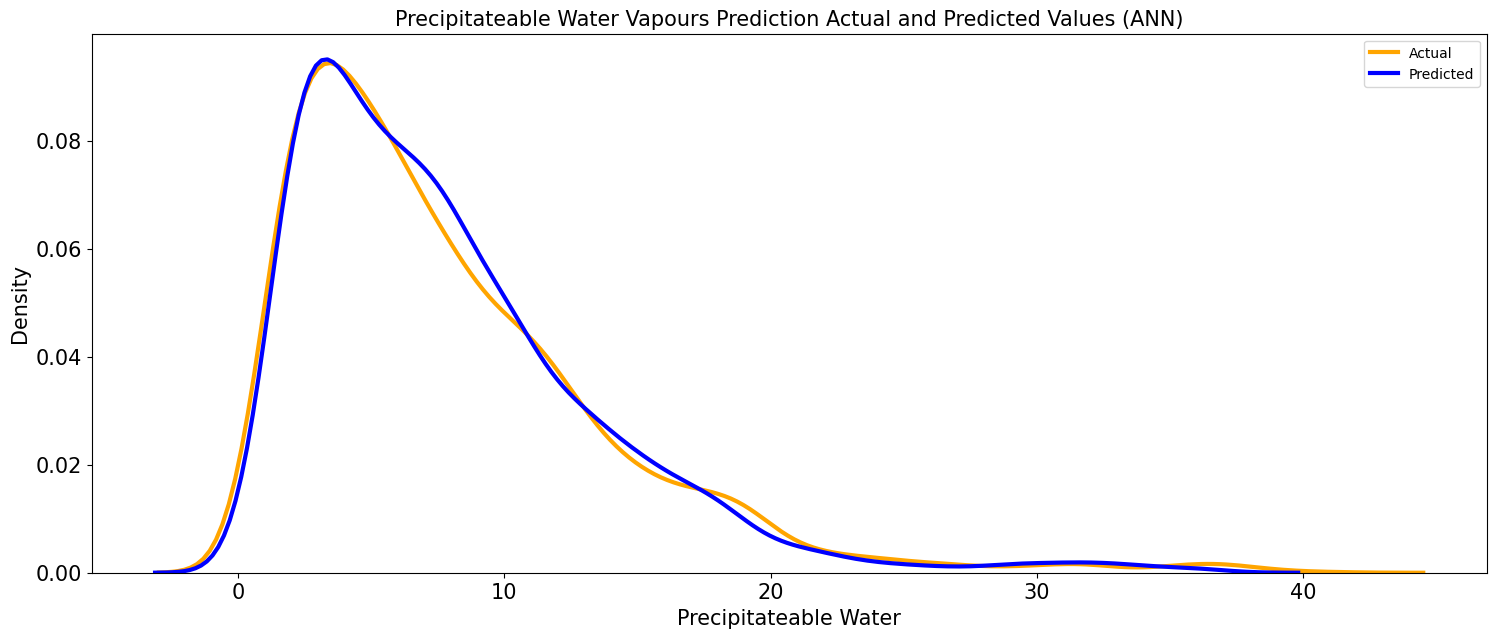

In [74]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_b6.flatten(), label = "Predicted", linewidth = 3, color = "blue")
plt.title("Precipitateable Water Vapours Prediction Actual and Predicted Values (ANN)", size = 15)
plt.xlabel("Precipitateable Water", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Precipitateable Water Vapours Prediction Comparison (SVM & ANN)

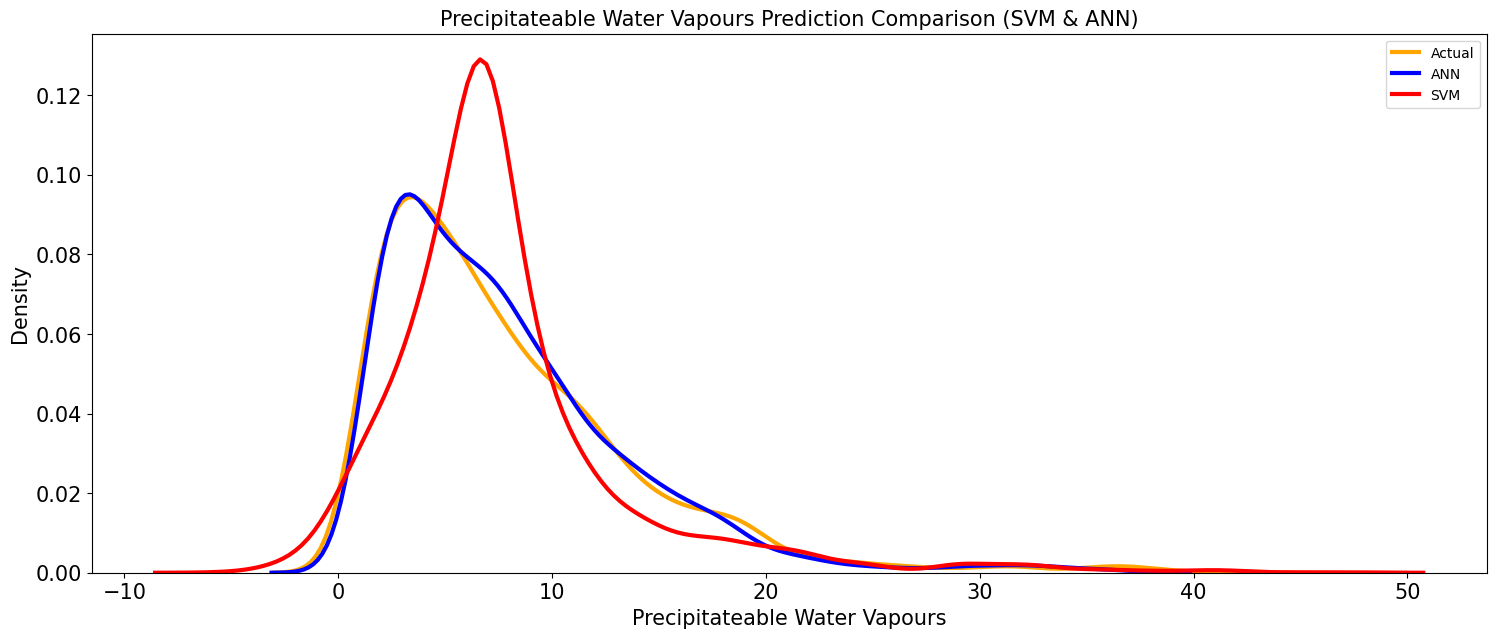

In [75]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_b6.flatten(), label = "ANN", linewidth = 3, color = "blue")
sns.kdeplot(pred_s6.flatten(), label = "SVM", linewidth = 3, color = "red")
plt.title("Precipitateable Water Vapours Prediction Comparison (SVM & ANN)", size = 15)
plt.xlabel("Precipitateable Water Vapours", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Wind Speed Prediction with SVM

In [76]:
# Festures
X = df[["surface humidity", "air temperature", "radiance intensity", "surface incomming short wave flux", "total column ozone",  "total precipitateable water vapours"]]

# Target
y = df["wind speed"]

In [77]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Instantiate Linear SVM Object
svm = SVR()

# Instantiate the GridSearchCV object and run the search
parameter = {'kernel':["linear", "poly"]}

searcher = GridSearchCV(svm, parameter)

searcher.fit(X_train_std, y_train)

# Report the best parameter and the corresponding score
print("Best CV params", searcher.best_params_, "\n")

print("Best CV accuracy", searcher.best_score_)

Best CV params {'kernel': 'poly'} 

Best CV accuracy 0.07812489128182545


In [78]:
pred_s7 = searcher.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_s7})[:5]

,Actual,Predicted
4058,5.626854,5.882937
11646,3.881111,4.834565
12411,1.829634,5.137756
5556,6.156575,5.263222
2348,7.449769,5.239574


In [79]:
rmse = MSE(y_test, pred_s7)**(0.5)
print("Root Mean Squared Error =", rmse)

Root Mean Squared Error = 2.140023159341596


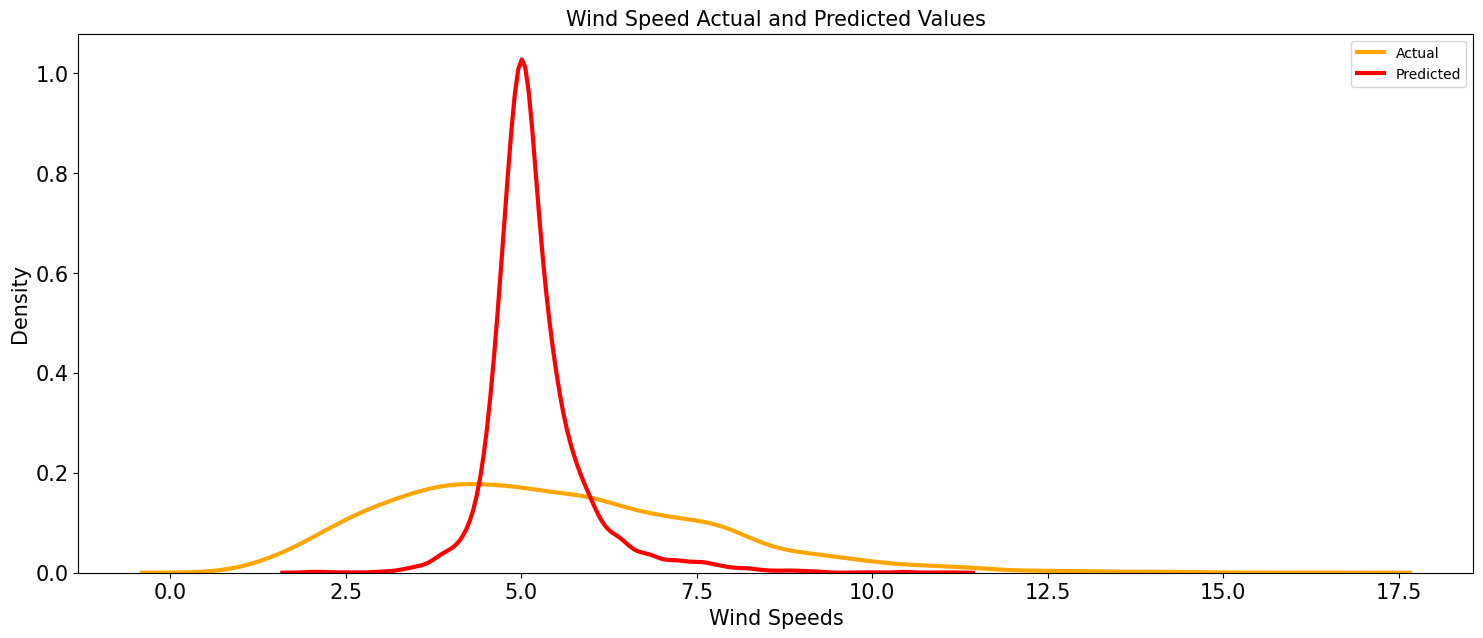

In [80]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_s7, label = "Predicted", linewidth = 3, color = "red")
plt.title("Wind Speed Actual and Predicted Values", size = 15)
plt.xlabel("Wind Speeds", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Wind Speed Prediction with ANN

In [81]:
# Festures
X = df[["air temperature", "surface humidity", "radiance intensity", "surface incomming short wave flux", "total column ozone",  "total precipitateable water vapours"]]

# Target
y = df["wind speed"]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(X_train_std, y_train, batch_size = 10, epochs = 100)

pred_a7 = model.predict(X_test_std)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_a7.flatten()})[:5]

Epoch 1/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.8708
Epoch 2/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.3848
Epoch 3/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.2115
Epoch 4/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.2252
Epoch 5/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.0819
Epoch 6/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.9656
Epoch 7/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.0409
Epoch 8/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.7809
Epoch 9/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.0023
Epoch 10/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.8592
Epoch 11/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.8729
Epoch 12/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.7825
Epoch 13/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.9313
Epoch 14/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.7562
Epoch 15/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 2

,Actual,Predicted
3615,3.328494,3.724634
4475,10.261907,6.984728
4695,6.815271,7.623683
12049,5.153111,6.968956
4783,8.027201,4.972318


In [83]:
rmse = MSE(y_test, pred_a7)**(0.5)
print("Root Mean Squared Error =", rmse.round(3))

Root Mean Squared Error = 1.799


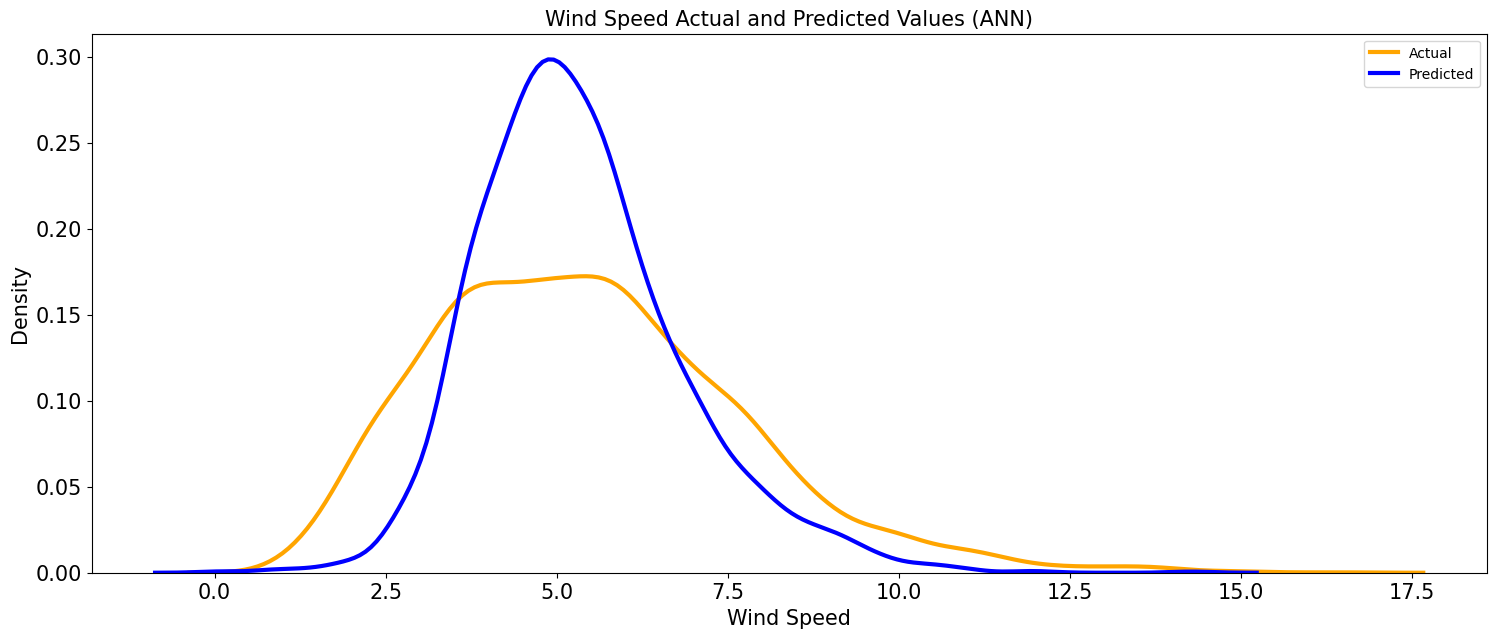

In [84]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a7.flatten(), label = "Predicted", linewidth = 3, color = "blue")
plt.title("Wind Speed Actual and Predicted Values (ANN)", size = 15)
plt.xlabel("Wind Speed", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

# Wind Speed Prediction Comparison (SVM & ANN)

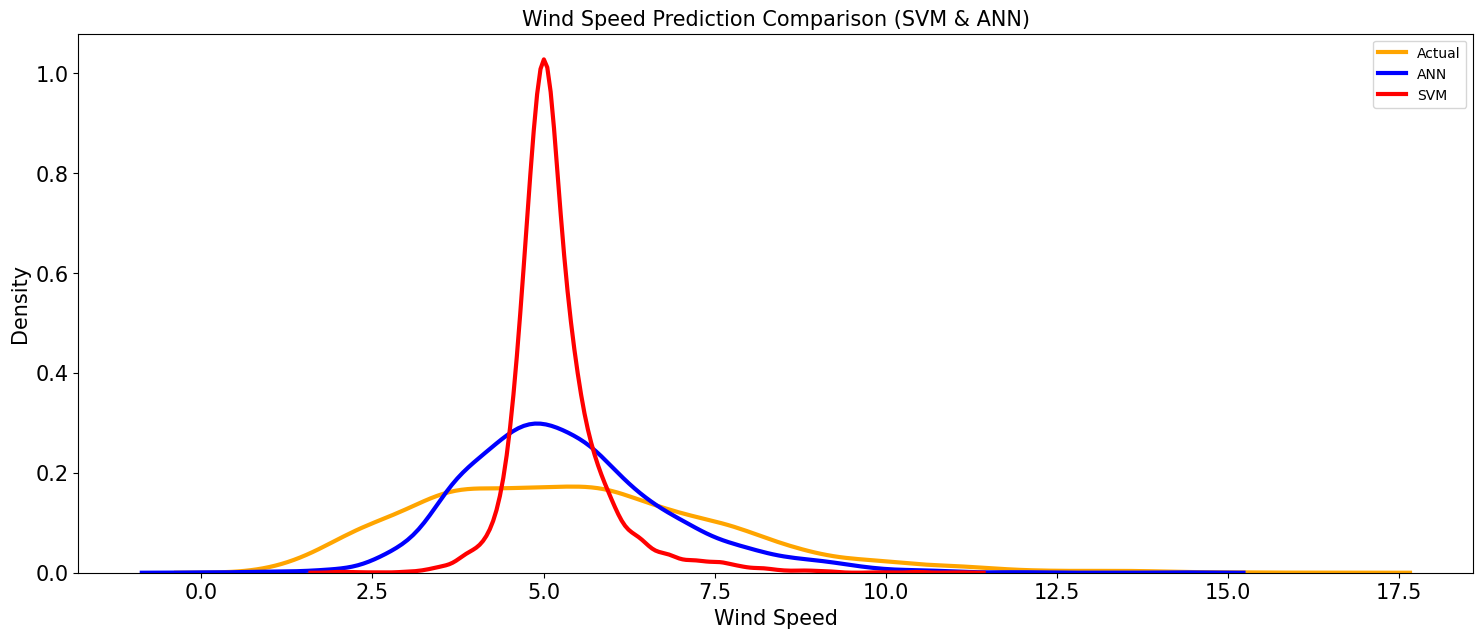

In [85]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a7.flatten(), label = "ANN", linewidth = 3, color = "blue")
sns.kdeplot(pred_s7.flatten(), label = "SVM", linewidth = 3, color = "red")
plt.title("Wind Speed Prediction Comparison (SVM & ANN)", size = 15)
plt.xlabel("Wind Speed", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()